In [1]:
import logging
import geopandas as gpd
import matplotlib.pyplot as plt
from sliderule import icesat2

import numpy as np
import datetime

/tmp/ipykernel_634/3866966462.py:2: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


In [2]:
outline = gpd.read_file('/home/jovyan/3DLAKE/Data/lago_outline.shp')
glaciers = gpd.read_file('/home/jovyan/3DLAKE/Data/17_rgi60_SouthernAndes.shp')

# projection to wgs84
outline_wgs84 = outline.to_crs(4326)
glaciers_wgs84 = glaciers.to_crs(4326)

# get 

bounds = outline_wgs84.bounds

minx = float(bounds.minx) - 0.02
maxx = float(bounds.maxx) + 0.02
miny = float(bounds.miny) - 0.02
maxy = float(bounds.maxy) + 0.02

In [3]:
print(minx)
print(maxx)
print(miny)
print(maxy)

region = [ {"lon":maxx, "lat": maxy},
           {"lon":minx, "lat": maxy},
           {"lon":minx, "lat": miny},
           {"lon":maxx, "lat": miny},
           {"lon":maxx, "lat": maxy} ]

-73.81772852063725
-73.71916783757038
-47.442935619892665
-47.37757036928131


<AxesSubplot: >

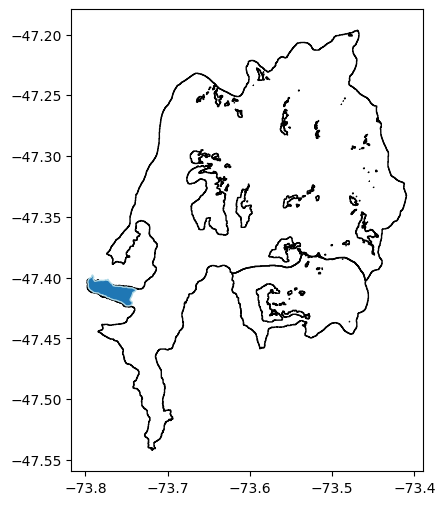

In [4]:
fig,ax = plt.subplots(num=None, ncols=1, figsize=(12, 6))
glaciers_wgs84.plot(ax=ax, facecolor = 'none')
outline_wgs84.plot(ax=ax, edgecolor="lightblue")

In [5]:
# Build ATL06 Request
parms = {
    "poly": region,
    "srt": icesat2.SRT_LAND,
    "cnf": icesat2.CNF_SURFACE_HIGH,
    "ats": 10.0,
    "cnt": 10,
    "len": 40.0,
    "res": 20.0,
    "maxi": 1
}

# Request ATL06 Data
gdf = icesat2.atl06p(parms)

# Display Statistics
print("Reference Ground Tracks: {}".format(gdf["rgt"].unique()))
print("Cycles: {}".format(gdf["cycle"].unique()))
print("Received {} elevations".format(len(gdf)))

Reference Ground Tracks: [956]
Cycles: [6]
Received 314 elevations


(None,)

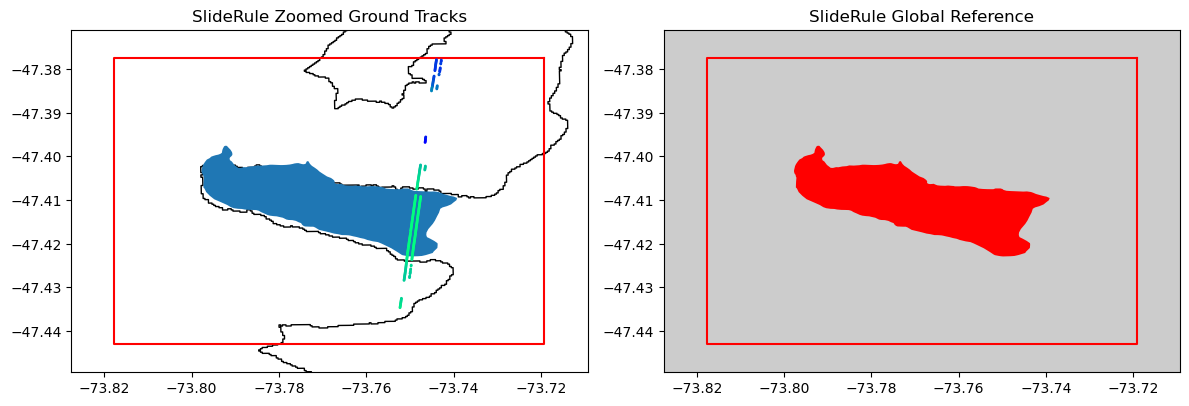

In [6]:
# Calculate Extent
lons = [p["lon"] for p in region]
lats = [p["lat"] for p in region]
lon_margin = (max(lons) - min(lons)) * 0.1
lat_margin = (max(lats) - min(lats)) * 0.1

# Create Plot
fig,(ax1,ax2) = plt.subplots(num=None, ncols=2, figsize=(12, 6))
box_lon = [e["lon"] for e in region]
box_lat = [e["lat"] for e in region]

# Plot SlideRule Ground Tracks
ax1.set_title("SlideRule Zoomed Ground Tracks")
gdf.plot(ax=ax1, column=gdf["h_mean"], cmap='winter_r', s=1.0, zorder=3000)
ax1.plot(box_lon, box_lat, linewidth=1.5, color='r', zorder=2)
outline_wgs84.plot(ax=ax1, zorder=1000)
glaciers_wgs84.plot(ax=ax1, facecolor='none') # linecolor='red'
ax1.set_xlim(min(lons) - lon_margin, max(lons) + lon_margin)
ax1.set_ylim(min(lats) - lat_margin, max(lats) + lat_margin)
ax1.set_aspect('equal', adjustable='box')

# Plot SlideRule Global View
ax2.set_title("SlideRule Global Reference")
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax2, color='0.8', edgecolor='black')
#outline_wgs84.plot(ax=ax2)
ax2.plot(box_lon, box_lat, linewidth=1.5, color='r', zorder=2)
outline_wgs84.plot(ax=ax2, lw=100, color='red')
#gdf.plot(ax=ax2, marker='o', color='red', markersize=2.5, zorder=3)
#gdf.plot()
ax2.set_xlim(-180,180)
ax2.set_ylim(-90,90)
ax2.set_xlim(min(lons) - lon_margin, max(lons) + lon_margin)
ax2.set_ylim(min(lats) - lat_margin, max(lats) + lat_margin)
ax2.set_aspect('equal', adjustable='box')

# Show Plot
plt.tight_layout(), 

In [7]:
import numpy as np
import datetime

In [8]:
gdf.index

DatetimeIndex(['2020-02-27 08:25:04.527628032',
               '2020-02-27 08:25:04.530463744',
               '2020-02-27 08:25:04.533293824',
               '2020-02-27 08:25:04.538888960',
               '2020-02-27 08:25:04.541715712',
               '2020-02-27 08:25:04.555891200',
               '2020-02-27 08:25:04.558714112',
               '2020-02-27 08:25:04.561516288',
               '2020-02-27 08:25:04.564317952',
               '2020-02-27 08:25:04.567130368',
               ...
               '2020-02-27 08:25:05.751180288',
               '2020-02-27 08:25:05.753992960',
               '2020-02-27 08:25:05.756807936',
               '2020-02-27 08:25:05.759627520',
               '2020-02-27 08:25:05.762448896',
               '2020-02-27 08:25:05.765270784',
               '2020-02-27 08:25:05.768094464',
               '2020-02-27 08:25:05.770917888',
               '2020-02-27 08:25:05.773740800',
               '2020-02-27 08:25:05.776564480'],
              dtype=